In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go
%matplotlib inline


In [3]:

train_df=pd.read_csv("C:/Users/LENOVO/covid19/data/train.csv")
test_df=pd.read_csv("C:/Users/LENOVO/covid19/data/test.csv")
train_df.head()

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [4]:
train_df.isna().sum()

Id                    0
County            69760
Province_State    40766
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [3]:
train_df.drop('County',axis=1,inplace=True)
train_df.drop('Province_State',axis=1,inplace=True)
train_df.set_index('Id',inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754934 entries, 1 to 969578
Data columns (total 6 columns):
Country_Region    754934 non-null object
Population        754934 non-null int64
Weight            754934 non-null float64
Date              754934 non-null object
Target            754934 non-null object
TargetValue       754934 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.3+ MB


In [4]:
train_df.head()

,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,
1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


##### Les 15 premiers pays avec le plus de cas confirmés:

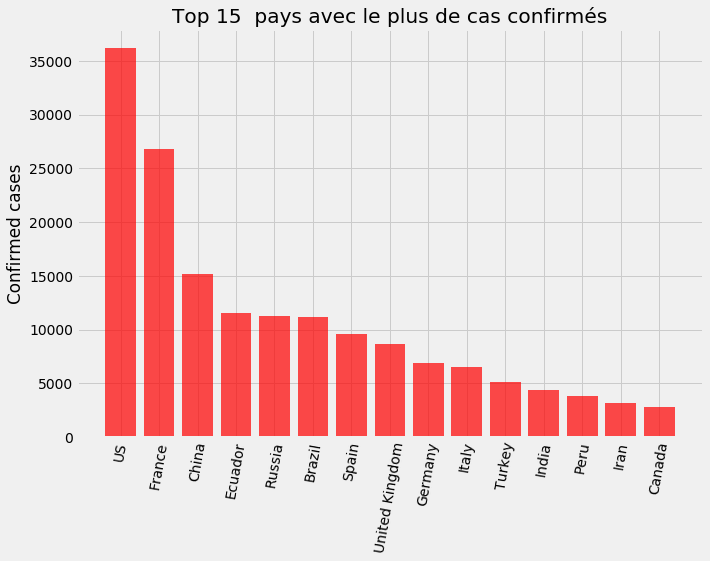

In [5]:

df1=train_df[train_df['Target']=='ConfirmedCases']

train_max_confirmed=pd.DataFrame()
train_max_confirmed['Confirmed_cases']  = df1.groupby('Country_Region')['TargetValue'].max().sort_values(ascending=False)
plot_confirmed= train_max_confirmed.head(15)


plt.style.use("fivethirtyeight")
fig,ax= plt.subplots(figsize=(10,7))
ax.bar(plot_confirmed.index, plot_confirmed['Confirmed_cases'],color='r',label='Confirmed cases',width=0.8,alpha=0.7)
ax.set_xticklabels(train_max_confirmed.index,rotation=80,color='black')
ax.set_ylabel('Confirmed cases')
ax.set_title('Top 15  pays avec le plus de cas confirmés')
plt.show()

##### Top 15 pays avec le plus de morts:

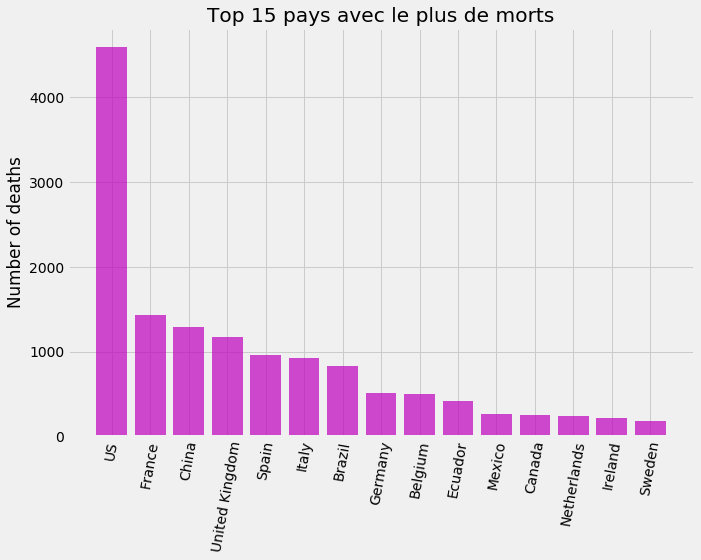

In [6]:
df2=train_df[train_df['Target']!='ConfirmedCases']
train_max_deaths=pd.DataFrame()
train_max_deaths['Fatalities']  = df2.groupby('Country_Region')['TargetValue'].max().sort_values(ascending=False)

plot_confirmed1= train_max_deaths.head(15)
plt.style.use("fivethirtyeight")
fig,ax= plt.subplots(figsize=(10,7))
ax.bar(plot_confirmed1.index, plot_confirmed1['Fatalities'],color='m',label='Deaths',width=0.8,alpha=0.7)
ax.set_xticklabels(plot_confirmed1.index,rotation=80,color='black')
ax.set_ylabel('Number of deaths')
ax.set_title('Top 15 pays avec le plus de morts')
plt.show()

**NEXT WE WILL ANALYSE THE TREND OF CASES AND DEATHS COUNTRY WISE(India,US,China,Italy and France)



In [7]:
df1.set_index('Date',inplace=True)
df2.set_index('Date',inplace=True)
df3=pd.concat([df1,df2],axis=1,ignore_index=True)
df3.drop([3,5,6,7,8],inplace=True,axis=1)
df3.rename(columns={0:'Country_Region',1:'Population',2:'Weight',4:'Confirmed',9:'Fatalities'},inplace=True)
df3.columns

Index(['Country_Region', 'Population', 'Weight', 'Confirmed', 'Fatalities'], dtype='object')

In [8]:
df3.head()

,Country_Region,Population,Weight,Confirmed,Fatalities
Date,,,,,
2020-01-23,Afghanistan,27657145,0.058359,0.0,0.0
2020-01-24,Afghanistan,27657145,0.058359,0.0,0.0
2020-01-25,Afghanistan,27657145,0.058359,0.0,0.0
2020-01-26,Afghanistan,27657145,0.058359,0.0,0.0
2020-01-27,Afghanistan,27657145,0.058359,0.0,0.0


In [9]:
train_df.head()

,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,
1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


###### LA RELATION ENTRE LA POPULATION DES PAYS ET LEURS CAS CONFIRMÉS OU MORTS:

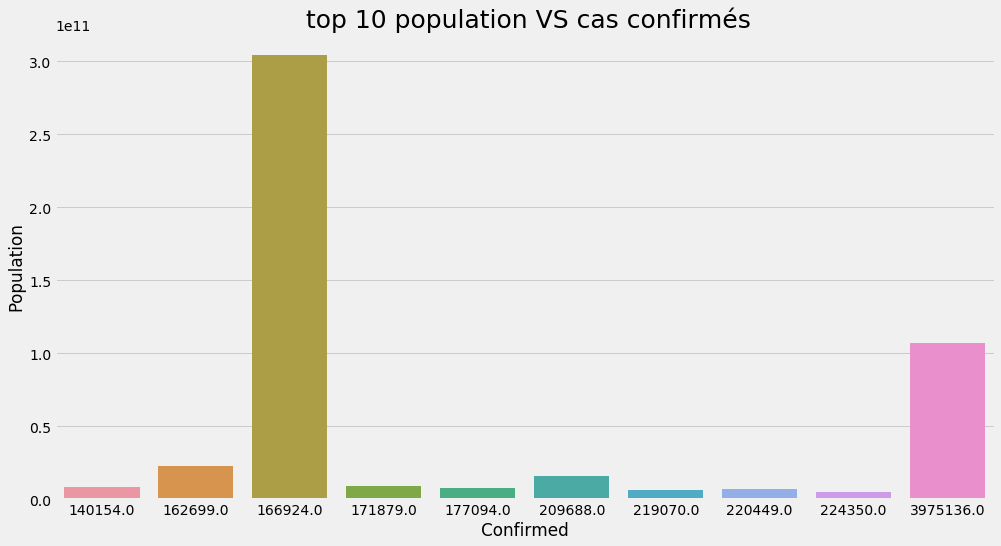

In [10]:
import seaborn as sns
df3_grouped=df3.groupby(['Country_Region']).sum()
df3_grouped.Confirmed
tot_conf= df3_grouped.nlargest(10,'Confirmed')
tot_deaths=df3_grouped.nlargest(10,'Fatalities')

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(y="Population", x="Confirmed", data=tot_conf,ax=ax)
plt.title(' top 10 population VS cas confirmés',size=25)
plt.show()

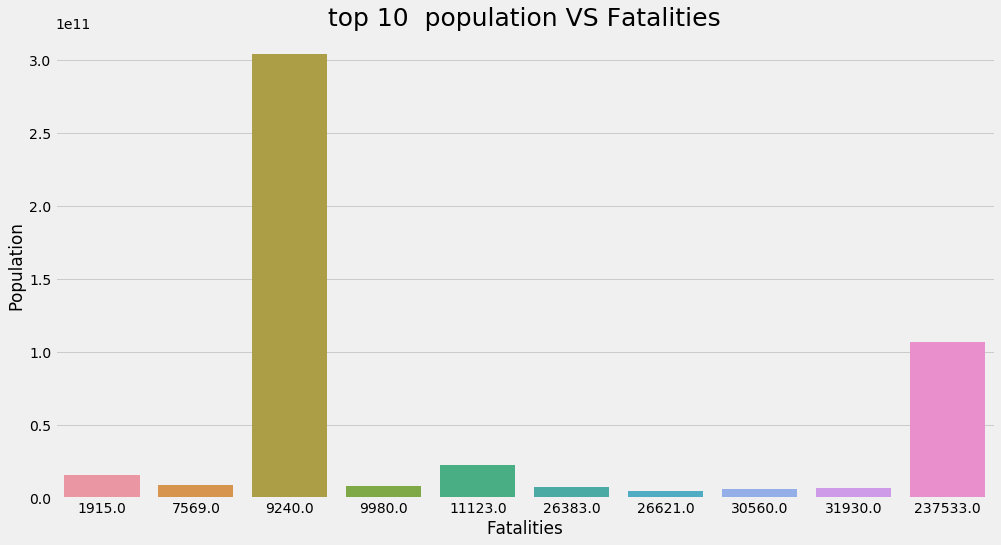

In [11]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(y="Population", x="Fatalities", data=tot_conf,ax=ax)
plt.title('top 10  population VS Fatalities',size=25)
plt.show()

#### => on peut déduire que le taux de mortalité et des cas confirmés ne sont pas liés à la population du pays

### Data preparation:

##### Encodage des variable quantitatives:

In [12]:
from sklearn import preprocessing
import category_encoders as ce
le = preprocessing.LabelEncoder()
#LabelEncoder can be used to normalize labels.
#fit_trainsform - Fit label encoder and return encoded labels
y=train_df["TargetValue"]
train_df['Target_numerical'] = le.fit_transform(train_df['Target'])
ce_target = ce.TargetEncoder(cols = ['Country_Region'])
ce_target.fit(train_df[['Country_Region']], y)
train_df['Country_numerical']= ce_target.transform(train_df[['Country_Region']], y)


train_df['Date'] = pd.to_datetime(train_df['Date'])


train_df['Dayofweek'] = train_df['Date'].dt.dayofweek
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df.head()

,Country_Region,Population,Weight,Date,Target,TargetValue,Target_numerical,Country_numerical,Dayofweek,Day,Month
Id,,,,,,,,,,,
1,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0,0,20.743119,3,23,1
2,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0,1,20.743119,3,23,1
3,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0,0,20.743119,4,24,1
4,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0,1,20.743119,4,24,1
5,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0,0,20.743119,5,25,1


In [13]:
#test_df.drop(['Province_State','County'],axis=1,inplace=True)

test_df['Target_numerical'] = le.fit_transform(test_df['Target'])
test_df['Country_numerical']= ce_target.transform(test_df[['Country_Region']])


test_df['Date'] = pd.to_datetime(test_df['Date'])


test_df['Dayofweek'] = test_df['Date'].dt.dayofweek
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df.head()

,ForecastId,County,Province_State,Country_Region,Population,Weight,Date,Target,Target_numerical,Country_numerical,Dayofweek,Day,Month
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases,0,20.743119,0,27,4
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities,1,20.743119,0,27,4
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases,0,20.743119,1,28,4
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities,1,20.743119,1,28,4
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases,0,20.743119,2,29,4


In [14]:
test_df.set_index('ForecastId',inplace=True)


In [15]:
from sklearn.model_selection import train_test_split

#Selecting feature columns
col_feat = ['Population', 'Weight','Target_numerical', 'Country_numerical', 'Dayofweek','Day', 'Month']
X = train_df[col_feat] # Features
y = train_df['TargetValue'] # Target variable
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [16]:
#CHECKING THE SHAPE
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',   y_train.shape)
print('Testing Features Shape:',  X_test.shape)
print('Testing Labels Shape:',    y_test.shape)

Training Features Shape: (528453, 7)
Training Labels Shape: (528453,)
Testing Features Shape: (226481, 7)
Testing Labels Shape: (226481,)


## Modeling:

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 

In [19]:
et=ExtraTreesRegressor(n_estimators=40, random_state=14)
y_predicted=et.fit(X_train, y_train).predict(X_test)
print('MAE: ', mean_absolute_error(y_test,y_predicted ))
print('train score :', et.score(X_train,y_train))
print('score: ', et.score(X_test,y_test))

MAE:  3.0762209449504962
train score : 0.9999995492294126
score:  0.9383939507993817


In [20]:
gb=GradientBoostingRegressor(n_estimators=800, random_state=14)
p=gb.fit(X_train, y_train).predict(X_test)
print('MAE: ', mean_absolute_error(y_test, p))
print('train score :', gb.score(X_train,y_train))
print('score: ', gb.score(X_test,y_test))

MAE:  8.053447617568136
train score : 0.896660071247597
score:  0.8351328589902196


In [21]:
DtR=DecisionTreeRegressor(random_state=14)
p=DtR.fit(X_train, y_train).predict(X_test)
print('MAE: ', mean_absolute_error(y_test, p))
print('train score :', DtR.score(X_train,y_train))
print('score: ', DtR.score(X_test,y_test))

MAE:  3.619369100866445
train score : 0.9999995492294126
score:  0.8932637108649321


In [22]:
LGBM=LGBMRegressor(n_estimators=200,random_state=14)
p=LGBM.fit(X_train, y_train).predict(X_test)
print('MAE: ', mean_absolute_error(y_test, p))
print('train score :', LGBM.score(X_train,y_train))
print('score: ', LGBM.score(X_test,y_test))

MAE:  6.286325143496325
train score : 0.9179366475678712
score:  0.8631444754835438


In [23]:
XGB=XGBRegressor(n_estimators=800,random_state=14)
p=XGB.fit(X_train, y_train).predict(X_test)
print('MAE: ', mean_absolute_error(y_test, p))
print('train score :', XGB.score(X_train,y_train))
print('score: ', XGB.score(X_test,y_test))

MAE:  4.540258570498827
train score : 0.997638324921809
score:  0.9193903314984185


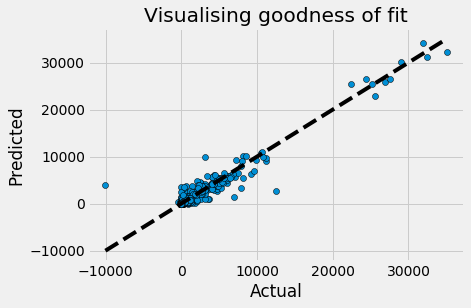

In [24]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Visualising goodness of fit")

plt.show()

In [25]:
#WORKING WITH TEST DATASET
test_col = ['Population', 'Weight','Target_numerical', 'Country_numerical', 'Dayofweek','Day', 'Month']
test_data = test_df[test_col]
test_df.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,Target_numerical,Country_numerical,Dayofweek,Day,Month
ForecastId,,,,,,,,,,,,
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases,0,20.743119,0,27,4
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities,1,20.743119,0,27,4
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases,0,20.743119,1,28,4
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities,1,20.743119,1,28,4
5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases,0,20.743119,2,29,4


In [26]:
test_data;

In [27]:
# predictions
y_predicted1 = et.predict(test_data)
y_predicted1

array([1.72e+02, 7.00e+00, 1.25e+02, ..., 2.50e-02, 6.25e-01, 2.50e-02])

In [28]:
#Creating a dataframe with iD and Predicted list
output_df=pd.DataFrame({'id':test_df.index,'TargetValue':y_predicted1})
output_df

,id,TargetValue
0,1,172.000
1,2,7.000
2,3,125.000
3,4,1.000
4,5,111.000
5,6,3.025
6,7,293.400
7,8,4.000
8,9,164.000
9,10,4.000
